# 3. Introduction to Probability Theory
This is a post that I have been excited to get to for over a year now. Probability theory plays an incredibly interesting and unique role in the studying of machine learning and articiail intelligence techniques. It gives us a wonderful way of dealing with **uncertainty**, and shows up in everything from **Hidden Markov Models**, **Bayesian Networks**, **Causal Path Analysis**, **Bayesian A/B** testing, and many other areas.

There are several things that make probability so interesting, and I am going to try and cover all of them in this post and several others. The main points are as follows:
* Probability is rather intertwined with statistics; we will dissect the differences and also how they fit together.
* Many paradox's arise from probability, which makes it rather unintuitive to understand. **Simpson's Paradox** and **the Monty Hall** problem are two hallmark probability paradox problems. We will go through each in detail to discuss why they are paradoxical, and how to remedy it.
* There are many different ways to visualize and conceptualize probability.
* **Discrete** vs. **Continuous** probability distributions cause certain visualizations to break down, causing a gap in understanding.

This post will not cover all of the above, but it will certainly help us build a base from which we can climb to higher levels of understanding. To begin, I want to start from a historical perspective, digging into how probability first came to be.

## 3.1 Historical Background and Definitions
At is core, probability theory was defined incredibly well by **Pierre-Simon Laplace** in 1814:

> Probability theory is nothing but common sense reduced to calculation. ... [Probability] is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible ... when nothing leads us to expect that any one of these cases should occur more than any other.

This simple summary should always be kept in mind when working with probability. The following terms must also be defined:

* **Trial**: A single occurrence with an outcome that is uncertain until we observe it. 
    * For example, rolling a single die.
* **Outcome**: A possible result of a trial; one particular state of the world. What Laplace calls a case. 
    * For example: 4.
* **Sample Space**: The set of all possible outcomes for the trial. 
    * For example, {1, 2, 3, 4, 5, 6}.
* **Event**: A subset of outcomes that together have some property we are interested in. 
    * For example, the event "even die roll" is the set of outcomes {2, 4, 6}.
* **Probability**: As Laplace said, the probability of an event with respect to a sample space is the "number of favorable cases" (outcomes from the sample space that are in the event) divided by the "number of all the cases" in the sample space (assuming "nothing leads us to expect that any one of these cases should occur more than any other"). Since this is a proper fraction, probability will always be a number between 0 (representing an impossible event) and 1 (representing a certain event). 
    * For example, the probability of an even die roll is 3/6 = 1/2.
   
There is one more term that I would like to discuss before moving onto the general rules of probability; that term is **probabilistic**. The term probabilistic is thrown around frequently without many people having a sound definition for what it really entails. Probabilistic can be defined as:

> **Probabilistic:** Subject to or involving chance variation

Another way of looking at it is that it deals with **uncertainty**. Now, uncertainty can come about in the real world in a variety of ways (no, I am not going to talk about rounds of cards):
1. We have a partial knowledge of the state of the world.
2. Noisy observations.
3. *Phenomena* not covered by our model.
4. Inherent **Stochasticity** 

The entire goal of probability theory is to allow us to allow us to deal with uncertainty in ways that are principled and proven. Now, these definitions must be understood and internalized before moving on. One of the troubles with probability is the new vocabularly that it introduces, so be sure to look back on these definitions if anything is unclear as we move forward. 

## 3.2 Probability Rules
Now, in general there are three very commonly used probabilities: **marginal**, **joint** and **conditional** probability. I like to do this via looking at an example, as I feel it will help keep the concepts more concrete. Suppose we have the situation shown in the table below:

<img src="https://drive.google.com/uc?id=1aNGxEap1BWNCnBbQlo8VJn8kp1RKtHs8" width="600">

Here we are looking at historical data surrounding an ecommerce site and purchases from different countries. Each cell corresponds to the number of people from a specific country who either purchased or did not purchase something from the site. This is known as a **discrete distribution**, which we will cover in more depth later in this post. For now, let's try and and answer some questions about this distribution, and in the process, get a feel for the main types of probability.

One final thing before we get going here. I want to quickly give an informal defintion for the term **random variable**. It comes up very frequently in the discussion of probability, and while we don't need to get into the technicalities surrounding it yet, we should have a general idea of what it represents:

> A **random variable** is a quantitative variable whose value depends on chance in some way. 

This is a very broad and informal definition, however it should at least convey the general idea. A random variable is not known until its value is observed. We can think of the roll of a die as a random variable, or if we were to flip a coin 3 times and set $X$ to be the number of heads, $X$ would then be a random variable that could take on the values: $\{1,2,3,4\}$

### 3.2.1 Marginal Probabilities
Say for a moment that we wanted to know:

> What is the probability that a user is from a specific country? 

Mathematically, that can be written as:

$$P(Country = c)$$

Where $c$ is the specific country you are interested in. Now, without knowing anything about marginal probabilities, I would guess that most people would end up with the following equation:

$$P(Country = c) = \frac{\text{users from } c}{\text{total number of users}}$$

This is entirely correct! Again, keeping in mind the original quote from Laplace, probability can very often be reduced to common sense and counting (at least in the discrete cases). So, we can do just that:

$$P(Country = Canada) = \frac{300 + 20}{300 + 20 + 50 + 500 + 10 + 200} = 0.30$$

$$P(Country = USA) = \frac{500 + 50}{300 + 20 + 50 + 500 + 10 + 200} = 0.51$$

$$P(Country = Mexia) = \frac{200 + 10}{300 + 20 + 50 + 500 + 10 + 200} = 0.19$$

Above we have just found the distribution $P(Country)$ over all countries. We can ensure that it is a correct and legal probability distribution by checking that it sums to 1:

$$\sum_{c} P(Country = c) = 0.3 + 0.51 + 0.19 = 1$$

Now, as I said earlier, I would have expected that even with _no knowledge_ of marginal probabilities most people would come to that conclusion. However, I want to give a way of thinking about the problem as it relates to marginal probabilities and **marginalization** (we will go over marginalization in much greater detail soon). 

When dealing with a distribution that contains multiple variables of interest, such as _purchase_ and _country_ in this case, we often want to acquire information about a single variable (such as country in the above example). To do that, we need to **marginalize** out the variable that we are not interested in (purchase in the above example). We intuitively did it above, but there is a great way to visualy think about this. Let's reconsider our table, but with a different shading of our cells:

<img src="https://drive.google.com/uc?id=11fqKDqAHHhFRFEaIcMncbZZETLjVMvR-" width="600">

Here, I have shaded the _purchased_ cell's gray since we are not interested in them. What we are interested in is the country information in the red and blue rows. We want to get rid of the purchase information, which by definition is what is means to **marginalize out** a variable. The visual trick here is to think of _collapsing_ the rows, so that the _purchase_ is erased and we are only left with our variable of interest: _country_.

<img src="https://drive.google.com/uc?id=1xh5D-zTZUZkneKF8w2FoPC7omc1Eu0en" width="600">

Now this visual collapsing is really just a summation along each individual column, but the ability to think about a visual collapse helps in understanding how we get rid of the variables that aren't of interest. Now, there is one issue though that I am sure you are wondering about at this point: This final table isn't a probability distrubtion is it? No, it is not! The row does not sum to 1, which actually brings us to our last step: Dividing each entry by the sum of the entire row to ensure it is a valid distribution:

<img src="https://drive.google.com/uc?id=1I_Y8LWwRx7cWUGwFIfXkDRRUW1Qw1KPx" width="600">

I hope that that visual has helped in understanding what is going on here, but if it still hasn't quite set in fear not! We will be going over a few more examples shortly. The main thing to take away is that on an intuitive level, a marginal distribution is used when trying to dissociate certain variables so you can gain insight into only the variable of interest. 

For those interested in more "text-book defintion", we can define a marginal distribution as:

> The marginal distribution of a subset of a collection of random variables is the probability distribution of the variables contained in the subset.

A marginal distribution gives the probabilities of various values of the variables in the subset without reference to the values of the other variables. **Marginal variables** are those variables in the subset of variables being _retained_. So, in our above case that would be _country_. These concepts are "marginal" because they can be found by summing values in a table along rows or columns, and writing the sum in the margins of the table. I don't like that visualization quite as much, but for reference that would look like:

<img src="https://drive.google.com/uc?id=1yxysUkkytZavgqZKv6xomXocRWJWOtAr" width="600">

The distribution of the marginal variables (the marginal distribution) is obtained by marginalizing – that is, focusing on the sums in the margin – over the distribution of the variables being discarded, and the discarded variables are said to have been marginalized out.

### 3.2.2 Joint Distribution 
Now let's move on to another question all together:

> What is the probability that someone will make a purchase and that they are from a certain country? 

Mathematically we can write that as:

$$P(Buy=b, Country=c)$$

Where $b$ is either 0 (they did not buy something) or 1 (they did buy something), and $c$ is again country. This visually looks like our original table:

<img src="https://drive.google.com/uc?id=1aNGxEap1BWNCnBbQlo8VJn8kp1RKtHs8" width="600">

Now, as before, I would guess that most people could probably reason about this problem based on general intuition. We know that there are two outcomes if a users buys (yes or no) and there are three countries. So, there are 6 total combinations of $b$ and $c$ that the above equation could be filled with. We can easily solve for each of the probabilities as follows:

$$P(Buy=1, Country=Canada)= \frac{20}{1080} = 0.019$$

$$P(Buy=0, Country=Canada)= \frac{300}{1080} = 0.28$$

$$P(Buy=1, Country=USA)= \frac{50}{1080} = 0.046$$

$$P(Buy=0, Country=USA)= \frac{500}{1080} = 0.46$$

$$P(Buy=1, Country=Mexico)= \frac{10}{1080} = 0.0093$$

$$P(Buy=0, Country=Mexico)= \frac{200}{1080} = 0.19$$

Above, we simply take each cell corresponding to $b$ and $c$ and divide its value by the total number of outcomes. Now, we just calculated the joint probabilities by what amounts to gut instinct. However, let's try and put _what just felt right_ into a more defined framework. For instance, what steps did we naturally take in order to calculate $P(Buy=1, Country=Canada)$?

Well, first and foremost we honed in on the column specifically associated with Canada. Because the table was already filled out we may not have even thought about it, but we actively _focused_ on a certain column. Well, that means that we needed to know how probable it was for a user to be from canada in the first place (that is a consequence of our focusing). This can be visualized as:

<img src="https://drive.google.com/uc?id=1OUBHqzdXcfMTyLHXtydL6Wz51uu4f_Sk" width="600">

Now, as just mentioned, this focusing must be accounted for in our calculation! By selecting the canada row, we must define how probable a user is to be from canada in the first place. Mathematically this looks like:

$$P(Country=Canada)$$

And from earlier, we know that is equal to:

$$P(Country=Canada) = \frac{320}{1080}$$

So, in defining a more robust way to reason about joint probabilities, we must ensure that the above is included! Now, after this focusing has occured, we are only looking at:

<img src="https://drive.google.com/uc?id=1Dzu8tM-qRcIEcAFk6NNFmsVh_MsbULTO" width="400">

Remember, the only way that we are able to ignore the rest of the table is if _we account for it in our equation_. That is why we need to make sure we include $P(Country=Canada)$ in our final calculation. 

So, with this focused view, what is the probability that someone from Canada buys something? Well, that can be written as:

$$P(Buy=1 \mid Country=Canada) = \frac{20}{320}$$

The way that we _encode_ the focusing that we had just done is via the $\mid$ symbol. In english, it means _given_. So, the entire equation above can be interpreted as: "The probability that a user does buy something, given that they are from canada". This idea of focusing will be defined more thoroughly in the next section concerning **conditional probability** and **conditioning** on certain variables. 

At this point, we have everything that we need to calculate $P(Buy=1, Country=Canada)$, via a more robust framework. Specifically, our equation is:

$$P(Buy=1, Country=Canada) = P(Buy=1 \mid Country=Canada) P(Country=Canada)$$

$$P(Buy=1, Country=Canada) = \frac{20}{320} *\frac{320}{1080} = 0.019$$

The equation above is the standard definition for joint probability. Written more generally, we have:

$$P(A,B) = P(A \mid B)P(B)$$

There is an additional visualization that can be rather helpful to further our understanding here:

<img src="https://drive.google.com/uc?id=1-yonC3jkzjoJ6pmm4M7MkfvMKpyKzYma" width="400"> 

We can think of the grey area above as our total probability space, of which there is also a space the represents the probability of being from canada, and another that represents the probability of buying something. Where those two areas overlap represents the probability of being from Canada and buying something.

With that we have just gone through an intuitive derivation of the formula for joint probability (in the discrete case). A few things are worth noting at this point:
* The table that we worked with above was the joint distribution
* As we add more variables it can be shown to increase the space of probabilities exponentially. For instance, we had 2 variables-one that had 2 potential values, the other 3 potential values, leaving us with a space of 6. If we added an additional variable that could have 2 potential values, our space would increase to 12. In the simplest case where each new variable is binary (and only holds 2 values), our space grows as: $2^n$, where $n$ is the number of variables in our distribution. This is known as the **curse of dimensionality**
* Notice that the final probabilities we found above are much smaller than the marginal probabilities. This is due to the fact that our distribution must sum to one, and since our total possibilities grows exponentially with each additional variable, the actual probabilities will shrink exponentially

Now, just as we did with marginal probabilities, we can close with some dry definitions for those who are interested:

> Given random variables $X$, $Y$, that are defined on a probability space, the joint probability distribution for $X$, $Y$, is a probability distribution that gives the probability that each of $X$, $Y$, falls in any particular range or discrete set of values specified for that variable. In the case of only two random variables, this is called a bivariate distribution, but the concept generalizes to any number of random variables, giving a multivariate distribution.

### 3.2.3 Conditional Probabilities
As before, we can transition to another question of interest:

> What is the probability that a user buys or doesn't buy, given that they are from a certain country? 

Again, just going off of gut instinct we can see that we start with the base table: 

<img src="https://drive.google.com/uc?id=1aNGxEap1BWNCnBbQlo8VJn8kp1RKtHs8" width="600">

We again perform the focusing that we talked about earlier, only now we have a new word for it: **conditioning**. Conditioning simply means that we are going to focus in on a subset of variables in the distributions in some way. Intuively, after we have focused our calculations look like:

$$P(Buy=1 \mid Country=Canada)= \frac{20}{320} = 0.07$$

$$P(Buy=0 \mid Country=Canada)= \frac{300}{320} = 0.93$$

$$P(Buy=1 \mid Country=USA)= \frac{50}{550} = 0.09$$

$$P(Buy=0 \mid Country=USA)= \frac{500}{550} = 0.91$$

$$P(Buy=1 \mid Country=Mexico)= \frac{10}{210} = 0.04$$

$$P(Buy=0 \mid Country=Mexico)= \frac{200}{210} = 0.96$$

Notice that the sum of the above results is three, not one. This is because country is no longer random at this point-it is given! So, the results for each given country sum to one, and since there are three countries all of the results sum to three. 

Now if we looked at a specific example, where we are trying to determine the probability that a user does or doesn't buy given they are from the united states, that would look like:

<img src="https://drive.google.com/uc?id=1mu2pIDnrEN-YZOWRyAQb5xadyNsH40Oj" width="600">

Now recall the equation for the joint distribution:

$$P(Buy=1, Country=USA) = P(Buy=1 \mid Country=USA) P(Country=USA)$$

In our current situation, we are not trying to solve for the joint, but rather the conditional probability above:

$$ P(Buy=1 \mid Country=USA) = \frac{P(Buy=1, Country=USA)}{P(Country=USA)}$$

The above was just some basic algebraic manipulation, but it allows us to express our conditional probability in a way that may not be quite as intuitive. However, the nice thing about it is that we already have values for the two probabilities on the right hand side of the equation!

$$ P(Buy=1 \mid Country=USA) = \frac{0.046}{0.51} = 0.09$$

And that is exactly what we had found above via our slightly more intuitive, gut-instinct approach. 

Now, using our visualization from before, we can think of finding $P(Buy=1 \mid Country=USA)$ as follows: 

<img src="https://drive.google.com/uc?id=1XpW1AGgUDGC_GliqeZ8xgZx-FyleKYhd" width="600">

We are specifically being _given_ information, in this case that the country is the USA. What that essentially means is that we are _focusing_ in on only the space where country is the USA. That space has a probability of 0.51. We then look at, within that space, what fraction of users buy something. In other words, we know that our total (focused) space has a size of 0.51 while our subspace where a user buys something is 0.046. We simply divide the latter by the former in order to compute our desired probability! 

So, we are (as always) looking for a specific event and then dividing by the total number of events. In this case, our total number of events is constrained (conditioned) based on the focusing around the country being the USA. 

These two visualizations are very helpful because they provide two unique viewpoints with the same information conveyed, but through a different medium (you could even say they are isomorphic, in the informal sense of the word). 

We can close our discussion of conditional probability by discussing a formal definition. 

> Conditional probability is a measure of the probability of an event (some particular situation occurring) given that (by assumption, presumption, assertion or evidence) another event has occurred. The conditional probability of A given B is written as $P(A \mid B)$. 

As another example, the probability that any given person has a cough on any given day may be only 5%. But if we know or assume that the person has a cold, then they are much more likely to be coughing. The conditional probability of coughing given that you have a cold might be a much higher 75%.

In the most general case, we define conditional probability as:

$$P(A \mid B) = \frac{P(A \cap B)}{P(B)}$$

### 3.2.4 Bayes Rule 
Now, I would like to give a quick introduction to the increasingly popularized **Bayes Rule**. At it's core, Bayes Rule is just a unification of conditional probability and the idea that two things that each equal a third thing must also equal each other (as shown by Euclid over 2,000 years ago). We just showed above the idea of conditional probability in one direction:

$$P(A \mid B) = \frac{P(A \cap B)}{P(B)}$$

But, the reverse is equally true:

$$P(B \mid A) = \frac{P(B \cap A)}{P(A)}$$

Because the order of a joint probability does not matter, we know that:

$$P(B \cap A) = P(A \cap B)$$

If we then multiply each of our conditionals by the respective marginal:

$$P(A \mid B)P(B) = P(A \cap B)$$

$$P(B \mid A)P(A) = P(A \cap B)$$

We see that in each of the two above equations, the left hand side equals $P(A \cap B)$. So, finally let's set the two left hand sides equal to each other:

$$P(A \mid B)P(B) = P(B \mid A)P(A)$$

The above relationship is Baye's rule! Now, I am dedicating the entire next post in this series to an in depth look at Bayes Rule, so we won't go into much more detail now. The purpose of the above was just to show that Bayes Rule is only a slight extension to our understanding of basic conditional probabilities. 

## 3.3 Discrete vs. Continuous Distributions
One of the biggest disconnects that many face when really trying to grok probability is the idea of a continuous vs. discrete distribution. The issue is not one of inherent difficulty, only that the majority of probability concepts are introduced with discrete distributions (as I have above). However, taking a few paragraphs to sort through the differences in a concrete manor will be incredibly valuable. Recall, the informal definition of a random variable that we discussed earlier:

> A random variable is a quantitative variable whose value depends on chance in some way. 

For example, suppose we are about to toss a coin 3 times. Let X represent the number of heads in the 3 tosses. X is a random variable that will take one of the values: 0,1,2,3. 

X is a random variable because it is a quantitative variable whose value depends on chance! We don't know what value X will take on until we actually toss the 3 coins and count the number of heads. But we do know that it will take on 1 of the above values, and we can even work out the probability of each of the above values occuring!  

Above X is what we call a **discrete random variable**. Discrete random variables can take on a *countable* number of possible values. Note, it can be finite or countable infinite number of possible values. A few examples are:

* Number of free throws an NBA player makes in his next 20 attempts
    * Possible values: 0,1,2,...,20
* The number of rolls of a die needed to roll a 3 for the first time
    * Possible values: 1,2,3.... (infinitely countable)
* The profit on a 1.50 bet on black in roulette
    * -1.5 and + 1.5 (2 values, most certainly countable) 

We also have what are known as **continuous random variables**, which can take on any value in an interval of values. Formally, they can take on an infinite number of possible values. For example, a continuous variable may take on a value between `[4,6]`. A few examples in this case are:

* The velocity of the next pitch in major league baseball
    * Doesn't just include integer values, but all values
* The time between lightning strikes in a thunderstorm
    * Time by nature is continuous 
    
### 3.3.1 Discrete Distributions
Now, if a random variable is a discrete variable, its probability distribution is called a **discrete probability distribution.**

An example will make this clear. Suppose you flip a coin two times. This simple statistical experiment can have four possible outcomes: HH, HT, TH, and TT. Now, let the random variable X represent the number of Heads that result from this experiment. The random variable X can only take on the values 0, 1, or 2, so it is a discrete random variable. The probability distribution for this statistical experiment appears below.

|Number of Heads|Probability|
|---------------|-----------|
|0|0.25|
|1|0.5|
|2|0.25|

And a graphical representation is shown below:

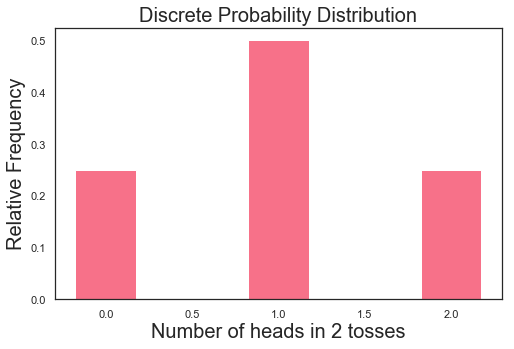

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="husl")
# sns.set_context("poster")
# sns.set_style("ticks")

%matplotlib inline

N = 3
menMeans = (0.25, 0.5, 0.25)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.subplots(figsize=(8,5))
p1 = plt.bar(ind, menMeans, width)

plt.ylabel('Relative Frequency', fontsize=20)
plt.title('Discrete Probability Distribution', fontsize=20)
plt.xlabel('Number of heads in 2 tosses', fontsize=20)


plt.show()

The above table represents a discrete probability distribution because it relates each value of a discrete random variable with its probability of occurrence.

Note: With a discrete probability distribution, each possible value of the discrete random variable can be associated with a non-zero probability. Thus, a discrete probability distribution can always be presented in tabular form.

### 3.3.2 Continuous Distributions
If a random variable is a continuous variable, its probability distribution is called a **continuous probability distribution.**

A continuous probability distribution differs from a discrete probability distribution in several ways.
* The probability that a continuous random variable will assume a particular value is zero.
* As a result, a continuous probability distribution cannot be expressed in tabular form.
* Instead, an equation or formula is used to describe a continuous probability distribution.

Most often, the equation used to describe a continuous probability distribution is called a **probability density function**. Sometimes, it is referred to as a **density function**, a **PDF**, or a **pdf**. For a continuous probability distribution, the density function has the following properties:

* Since the continuous random variable is defined over a continuous range of values (called the **domain** of the variable), the graph of the density function will also be continuous over that range.
* The area bounded by the curve of the density function and the x-axis is equal to 1, when computed over the domain of the variable.
* The probability that a random variable assumes a value between a and b is equal to the area under the density function bounded by a and b.

For example, consider the probability density function shown in the graph below. Suppose we wanted to know the probability that the random variable X was less than or equal to $a$. The probability that X is greater than or equal to $a$ is equal to the area under the curve bounded by $a$ and positive infinity - as indicated by the shaded area.

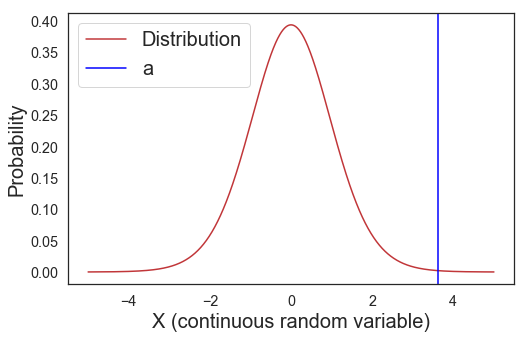

In [67]:
import numpy as np
from scipy import stats
import matplotlib.mlab as mlab
import math
N = 10
mean_a = 2
a = np.random.randn(N) + mean_a

mean_b = 0 
b = np.random.randn(N) + mean_b

var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

s = np.sqrt( (var_a + var_b)/2 )

t = (a.mean() - b.mean())/ (s * np.sqrt(2/N) )

df = 2*N - 2

# imports needed for plots


# ---------------plotting t dist and our t statistic -------------

# styling
sns.set(style="white", palette="RdBu")
fig, ax = plt.subplots(figsize=(8,5))

# plotting distribution
x = np.linspace(-5, 5, 1000)
plt.plot(x, stats.t.pdf(x, df))

# plotting t value
plt.axvline(x=t, color="blue")

# setting axes
ax.set_xlabel('X (continuous random variable)', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['Distribution', 'a'], fontsize=20)

plt.show()

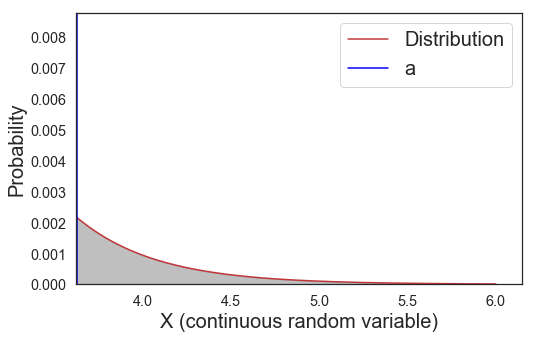

In [68]:
# ---------------zooming in on t dist and our t statistic -------------

# styling
sns.set(style="white", palette="RdBu")
fig, ax = plt.subplots(figsize=(8,5))

# plotting t distribution
x = np.linspace(3, 6, 1000)
y1 = stats.t.pdf(x, df)
plt.plot(x, y1)

# plotting t value
plt.axvline(x=t, color="blue")

# setting limits so that the area we are finding can be shaded
plt.xlim(t-.005)
plt.ylim(0)
y0 = 0

# shading the area based on limits
plt.fill_between(x, y1, y0, color='grey', alpha='0.5')

# setting axes
ax.set_xlabel('X (continuous random variable)', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)
ax.tick_params(labelsize="large")
ax.legend(['Distribution', 'a'], fontsize=20)

plt.show()

Note: The shaded area in the graph represents the probability that the random variable X is greater than or equal to $a$. This is a cumulative probability. However, the probability that X is exactly equal to a would be zero. A continuous random variable can take on an infinite number of values. The probability that it will equal a specific value (such as $a$) is always zero.

### 3.3.2.1 Probability Density Functions
Now we just looked at a probability density function above, but we can take a moment to further formalize it:

> We model a continuous random variable with a curve $f(x)$, called a **probability density function** (pdf).

Another example is shown below:

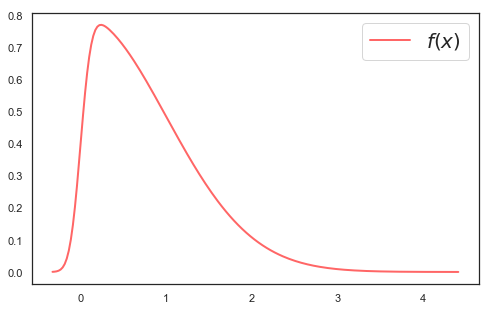

In [71]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(figsize=(8,5))
a = 10
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

x = np.linspace(skewnorm.ppf(0.00001, a),
                 skewnorm.ppf(0.99999, a), 200)
ax.plot(x, skewnorm.pdf(x, a),
        'r-', lw=2, alpha=0.6, label='skewnorm pdf')
ax.legend(['$f(x)$'], fontsize=20)
plt.show()

$f(x)$ represents the height of the curve at the point $x$. For continuous random variables, probabilities are the **areas under the curve**. This is shown visually below:

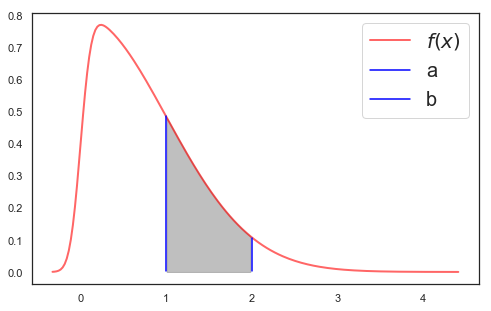

In [72]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(figsize=(8,5))
a = 10
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

x = np.linspace(skewnorm.ppf(0.00001, a),
                 skewnorm.ppf(0.99999, a), 200)
y = skewnorm.pdf(x, a)
ax.plot(x, skewnorm.pdf(x, a),
        'r-', lw=2, alpha=0.6, label='skewnorm pdf')

# plotting t value
ax.axvline(x=1, ymin=0.05, ymax=0.62, color="blue")
ax.axvline(x=2, ymin=0.05, ymax=0.17, color="blue")

# # setting limits so that the area we are finding can be shaded
# plt.xlim(t-.005)
# plt.ylim(0)
y0 = 0
x_shaded = x[56:98]
y_shaded = y[56:98]

# shading the area based on limits
ax.fill_between(x_shaded, y_shaded, y0, color='grey', alpha='0.5')
ax.legend(['$f(x)$', 'a', 'b'], fontsize=20)
plt.show()

The height of the curve is represented by $f(x)$. The probability that a random variable $x$ falls between the values a and b, is simply the area under the curve between $a$ and $b$ (the grey shaded region). 

One important notion here is that the probability that the random variable $x$ is *exactly* equal to one specific value, is 0. We could say that the probability that the random variable x is equal to the value $a$ is 0 for any $a$. Mathematically that looks like:

$$P(X=a) =0$$

We can think of a as an infintesimally small point with an infintesimally small area above it, so we call that area zero. So from a practical point of view, it only makes sense to talk about a random variable $x$ falling in an interval of values. 

### 3.3.2.2 Finding Probabilities and Percentiles for a Continuous Probability Distribution
There are two main features to keep in mind when dealing with and defining continuous probability distributions:
* $f(x) \geq 0$ for all $x$
* The area under the entire curve is equal to one

Now, let's go through a quick example to solidify these concepts. Suppose for a random variable $X$:

$$f(x)=cx^3$$

When:

$$2 \leq x \leq 4 \;and\;otherwise\;0$$

And $c$ is just some constant. 

The question we want to answer is: **what value of $c$ makes this a legitimate probabilty distribution?**

Okay well lets think, what needs to be satisfied in order for $f(x)$ to be a legitimate probability distribution?
* First, it can *never* take on negative values. Since x ranges from (2,4), we know that c must be positive.  
* Second, the area under the entire curve must equal 1. Mathematically that looks like:

$$\int_{-\infty}^{\infty}f(x)dx=1$$

And in our example it specifically looks like:

$$\int_{2}^{4}cx^3dx=1$$

Lets carry out this integration quickly as a refresher.

$$c\int_{2}^{4}x^3dx=1$$

$$c\Big[\frac{x^4}{4}\Big]_2^4$$

$$c\Big[\frac{4^4}{4}-\frac{2^4}{4}\Big]$$

$$60c$$

And we know that the entire area under the curve must equal one, so in this case:

$$60c = 1$$

$$c = \frac{1}{60}$$


### 3.3.2.3 Determine a Probability
Suppose we wanted to find the probability that a random variable X takes on a value greater than 3:

$$P(X>3)$$

For continuous probability distributions, probabilty is simply the area under the curve, so in our case it simply the area under the curve to the right of 3! We can find that value by using integration! Lets walk through that now.

$$\int_{3}^{4}\frac{1}{60}x^3dx$$

$$\frac{1}{60}\Big[\frac{x^4}{4}\Big]_3^4$$

$$\frac{1}{60}\Big[\frac{4^4}{4}-\frac{3^4}{4}\Big]$$

$$\frac{175}{240} = 0.729$$

## 3.4 Marginalization
The final introductory probability concept that I wanted to highlight was that of **marginalization**. We have seen marginalization before when determining our marginal probabilities. We can informally define marginalization as follows:

> **Marginalization**: A way to safely ignore variables.

And, as a quick reminder of what we just discussed earlier:
* **Marginal probability**: is the probability of any single event occurring unconditioned on any other events. Whenever someone asks you whether the weather is going to be rainy or sunny today, you are computing a marginal probability. 
* ** Joint probability**: probability of more than one event occurring simultaneously. If I ask you whether the weather is going to be rainy and the temperature is going to be above a certain number, you are computing a joint probability.
* **Conditional probability**:  probability of an event occurring given some events that you have already observed. When I ask you what’s the probability that today is rainy or sunny given that I noticed the temperature is going to be above 80 degrees, you are computing a conditional probability.

Okay, we are now ready to dig into the discrete case of marginalization.

### 3.4.1 Marginalization $\rightarrow$ Discrete
Let's start with a simple discrete example. Say we have a the following table:

<img src="https://drive.google.com/uc?id=1rfE1rxv-Rn_7lgM_G1su_vGOYRL-FugF" width="400">

Now, let's ask: What is the probability that someone is experiencing symptoms? In order to solve this, intuitively we say:

> What are all of the ways in which someone can be experience symptoms? 

In other words, what is the probability that $Y=1$?

$$p(Y=1)$$

In order to find that we can just sum up the different ways in which $Y=1$! Visually that looks like:

<img src="https://drive.google.com/uc?id=10skKfKglkRI9mjs3R5Ulks0Lr5t7DOm0" width="400">

And we can write it as:

$$p(Y=1) = p(Y=1, X=0) + p(Y=1, X=1) = 0.1 + 0.3 = 0.4$$

This can be rewritten with a summation for consciseness: 

$$p(Y=1) = \sum_{x}p(Y=1, X=x)$$

Now, our general case above can be expanded for the general formula of marginalization:

$$P(Y=y) = \sum_{x}p(Y=y, X=x)$$

Now, keep in mind that we can do the exact same thing to the $X$ variable if we'd like; that is, we can marginalize out $Y$ and be left with only $X$. For instance, say we want to know:

> What is the probability that someone has the disease? 

Intuitvely, we know that is just _the probability someone has the disease and shows symptons_, plus _the probability someone has the disease and doesn't show symptoms_.

<img src="https://drive.google.com/uc?id=1VzQ_X9PmN3xXgbz6i4r4GnWtyueG26qy" width="400">

And we can write it as:

$$p(X=1) = p(Y=0, X=1) + p(Y=1, X=1) = 0.1 + 0.3 = 0.4$$

### 3.4.1.1 Discrete Case Intuition
A way to think about this in the discrete case (when we are dealing with tables), is that we are _collapsing_ the dimension that we are marginalizing out. For instance, our table above represents the _**joint distribution**_ between _disease_ and _symptoms_. Now, if we wanted to find just the distribution of _symptoms_, we would need to marginalize out _disease_:

$$P(Symptoms) = \sum_{disease={yes,no}}p(Symptoms, Disease=disease)$$

$$P(Y) = \sum_{x}p(Y, X=x)$$

The key is to remember how this looks visually:

<img src="https://drive.google.com/uc?id=18HW5nckCyi3_zOLSzl7b7LOhzwwFGa5T" width="700">

We can see that out columns in $X$ (the disease) were collapsed into a single probability column for $Y$, and the $X$ variable no longer remained. 

### 3.4.1.2 A Confusing Convention
You may notice that if we are trying to find $p(Y)$ for all $y$, the equation to do so is written as:

$$P(Y) = \sum_{x}p(Y, X=x)$$

What may seem strange if you think about this from the mechanical perspective (or if you think about implementing it in code), is that we seem to be missing an iterator. In other words, what we are trying to do is sum over all $x$ in $X$, _for each_ $y$. In code we could write it as:

```
P(y,x) # Joint Distribution
P(y) # Marginalized Distribution
for y in Y:
    for x in X:
        P(y) += P(y,x)
```

However, when we write the actual mathematical equation, that first iterator that occurs over all $y$ is missing. That is simply a convention, nothing more. 


### 3.4.2 Marginalization $\rightarrow$ Continuous
Now, let's take a moment to look at our continuous case. Visually, a continuous joint distribution looks like:

<img src="https://drive.google.com/uc?id=1M2p4eP6MDpmSGC4RcvdxZc28uoRCjZhn" width="450">

Where we have two variables, $X_1$ and $X_2$, and then the probability density on our vertical axis. Our probability density function looks like:

$$p(X_1, X_2)$$

Note, the volume under this curve must be equal to 1, since the total volume under the density function represents the probability of our variables $X_1$ and $X_2$.

Now, what if we were asked to find $P(X_1)$? In order to do that we would need to _marginalize_ out $X_2$. Mathematically, that would look like:

$$P(X_1) = \int_{x_2= - \infty}^{x_2 = \infty}p(X_1, X_2 = x_2)$$

But what can that be viewed as visually? Well, let's think for a moment. We are going through all possible values of $X_1$ (this is not written explicitly, but implied based on the convention of marginalization), and for each we want to find the area under curve at that value (the area under the curve along the $X_2$ axis). Let's take $x_1 = -0.6$ for instance. Visually, when we fix $X_1 = -0.6$, we have the following curve, shown in pink:

<img src="https://drive.google.com/uc?id=13kyapVs6BSdLyM0zkWS_I_76bwZJ_QF5" width="450">

That curve is occuring in only 2-dimensions (since $X_1$ is fixed). Now, the integral is finding the _area_ under that curve, from $X_2 = -\infty$ to $X_2 = \infty$. 

<img src="https://drive.google.com/uc?id=1Ocx9gxX4B9yWOEnq4CyWuj1KVfIYIDFe" width="450">

That _total area_, shaded in pink, is then going to the be $X_1$ probability value! 

<img src="https://drive.google.com/uc?id=1T5c4xmU_gKaTyPTO3wmKFMXbh1BRJui6" width="450">

This can then be repeated across all values of $X_1$, until we finally end up with a probability distribution that no longer contains $X_2$ (seen in orange)! 

<img src="https://drive.google.com/uc?id=10hXu3pTXv0hLLRl5txrPvy4xxJwCsams" width="450">

We can see that the $X_2$ dimension was collapsed, with each area associated with a fixed $X_1$ being the final probability at that $X_1$!